# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [58]:
# dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
dataDir = "D:/AV/DataSetExploration/jaywalker"

In [59]:
exec(open('init_notebook.py').read())

FileNotFoundError: [Errno 2] No such file or directory: 'init_notebook.py'

In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [62]:
allDf = pd.read_csv(os.path.join(dataDir, f"2022-12-30-00-00-tracks-no-force.csv"))
pedDf = allDf[allDf['class'] == 'pedestrian'].copy()

In [63]:
pedDf.head()

,frame,mapX,mapY,recordingId,trackId,class
0,1,-113.0,-3.0,1,46,pedestrian
1,2,-113.0,-3.0,1,46,pedestrian
2,3,-113.0,-3.0,1,46,pedestrian
3,4,-113.0,-3.0,1,46,pedestrian
4,5,-113.0,-3.0,1,46,pedestrian


In [64]:
minYDisplacement = 3
maxXDisplacement = 6

visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='trackId', 
        xCol='mapX', 
        yCol='mapY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed',
        fps = 25.0
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

In [65]:
transformer.deriveAxisVelocities(pedDf)
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,frame,mapX,mapY,recordingId,trackId,sceneXVelocity,sceneYVelocity,speed,displacementX,displacementY
count,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000
mean,86.523342,-113.859033,-7.091436,99.073500,536.367501,0.320189,1.602325,1.785118,1.307158,4.091436
std,50.143121,1.796145,3.307736,56.897774,284.488869,1.398295,2.643140,2.902537,1.501793,3.307736
min,1.000000,-122.792664,-14.856646,1.000000,46.000000,-23.922920,-2.575421,0.000000,0.000000,0.000000
25%,43.000000,-114.770470,-9.889830,50.000000,291.000000,-0.100803,1.274452,1.568684,0.094425,0.744991
50%,86.000000,-113.177742,-6.850099,99.000000,536.000000,0.159645,1.728034,1.986576,0.725113,3.850099
75%,129.000000,-112.983185,-3.744991,148.000000,781.000000,0.884247,1.918715,2.006207,2.078190,6.889830
max,269.000000,-108.659500,-3.000000,198.000000,1031.000000,28.747749,38.435483,38.479098,9.792664,11.856646


In [66]:
pedDf.describe()

,frame,mapX,mapY,recordingId,trackId,sceneXVelocity,sceneYVelocity,speed,displacementX,displacementY
count,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000,33823.000000
mean,86.523342,-113.859033,-7.091436,99.073500,536.367501,0.320189,1.602325,1.785118,1.307158,4.091436
std,50.143121,1.796145,3.307736,56.897774,284.488869,1.398295,2.643140,2.902537,1.501793,3.307736
min,1.000000,-122.792664,-14.856646,1.000000,46.000000,-23.922920,-2.575421,0.000000,0.000000,0.000000
25%,43.000000,-114.770470,-9.889830,50.000000,291.000000,-0.100803,1.274452,1.568684,0.094425,0.744991
50%,86.000000,-113.177742,-6.850099,99.000000,536.000000,0.159645,1.728034,1.986576,0.725113,3.850099
75%,129.000000,-112.983185,-3.744991,148.000000,781.000000,0.884247,1.918715,2.006207,2.078190,6.889830
max,269.000000,-108.659500,-3.000000,198.000000,1031.000000,28.747749,38.435483,38.479098,9.792664,11.856646


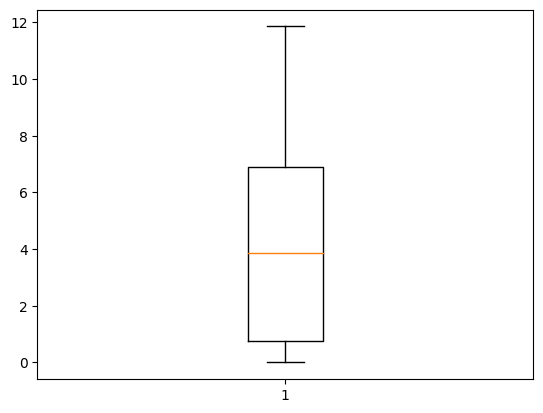

{'whiskers': [<matplotlib.lines.Line2D at 0x2c7c1505220>,
 'caps': [<matplotlib.lines.Line2D at 0x2c7c14efcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c7c14d9eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c7c14ef8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c7c14ef9a0>],
 'means': []}

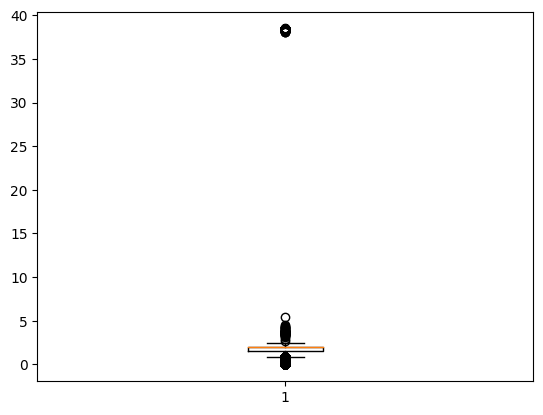

In [67]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [68]:
outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=False, returnVals=True)
outliers

using range (0.0, 3.5)


,speed
trackId,
46,38.440686
51,38.431252
56,38.416097
61,38.422957
66,38.435380
...,...
1006,38.199695
1011,38.433319
1016,38.407505


In [69]:
outliers = cleaner.getOutliersByYDisplacement(pedDf, byIQR=False, returnVals=True)
outliers

using min Y displacement (3)


,displacementY
trackId,
1031,0.007032


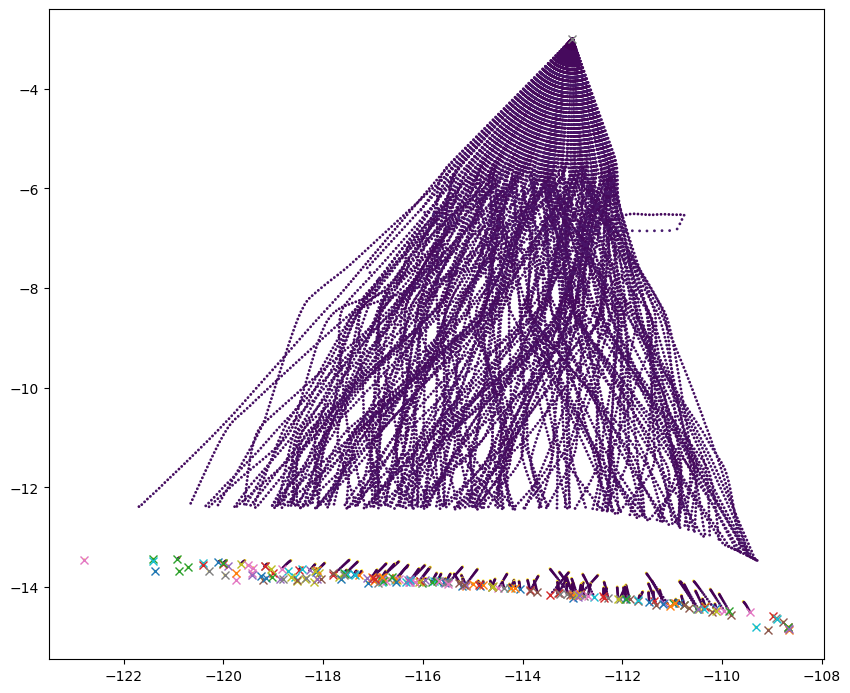

In [75]:

visualizer.show(pedDf, idCol = 'trackId', xCol = 'mapX', yCol = 'mapY', colorCol='speed')

In [71]:
pedDf["trackId"].unique()

array([  46,   51,   56,   61,   66,   71,   76,   81,   86,   91,   96,
        101,  106,  111,  116,  121,  126,  131,  136,  141,  146,  151,
        156,  161,  166,  171,  176,  181,  186,  191,  196,  201,  206,
        211,  216,  221,  226,  231,  236,  241,  246,  251,  256,  261,
        266,  271,  276,  281,  286,  291,  296,  301,  306,  311,  316,
        321,  326,  331,  336,  341,  346,  351,  356,  361,  366,  371,
        376,  381,  386,  391,  396,  401,  406,  411,  416,  421,  426,
        431,  436,  441,  446,  451,  456,  461,  466,  471,  476,  481,
        486,  491,  496,  501,  506,  511,  516,  521,  526,  531,  536,
        541,  546,  551,  556,  561,  566,  571,  576,  581,  586,  591,
        596,  601,  606,  611,  616,  621,  626,  631,  636,  641,  646,
        651,  656,  661,  666,  671,  676,  681,  686,  691,  696,  701,
        706,  711,  716,  721,  726,  731,  736,  741,  746,  751,  756,
        761,  766,  771,  776,  781,  786,  791,  7